In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns

## Load the data

In [2]:
# Load the movie metadata
movie_metadata = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/ada-2024-project-data_brigada/data/clean/movie_metadata_cleaned.csv')

# Load the character metadata
character_metadata = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/ada-2024-project-data_brigada/data/clean/character_metadata_cleaned.csv')

# Load the tv tropes data
tv_tropes = pd.read_csv('/Users/nhatanhdao/Documents/EPFL/MA1/ada/Project/MovieSummaries/tvtropes.clusters.txt', sep='\t')
tv_tropes.columns = ['Character trope', 'Movie information']

In [3]:
movie_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Name,Release date,Box office revenue,Runtime,Languages,Countries,Genres
0,975900,/m/03vyhn,Ghosts of Mars,2001.0,24105751.0,98,['English'],['United States'],"['Thriller', 'Science Fiction', 'Horror', 'Adv..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000.0,NaN,95,['English'],['United States'],"['Mystery', 'Biographical film', 'Drama', 'Cri..."
2,28463795,/m/0crgdbh,Brun bitter,1988.0,NaN,83,['Norwegian'],['Norway'],"['Crime Fiction', 'Drama']"
3,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110,['English'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological..."
4,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106,['German'],['Germany'],['Drama']


In [4]:
character_metadata.head()

,Wikipedia movie ID,Freebase movie ID,Release date,Character name,Actor date of birth,Actor gender,Actor height(meters),Actor ethnicity,Actor name,Actor age at release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID
0,975900,/m/03vyhn,2001.0,Akooshay,1958.0,F,1.620,"['GreaterEuropean,WestEuropean,Hispanic']",Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001.0,Lieutenant Melanie Ballard,1974.0,F,1.780,"['GreaterEuropean,British']",Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001.0,Desolation Williams,1969.0,M,1.727,"['GreaterEuropean,British']",Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001.0,Sgt Jericho Butler,1967.0,M,1.750,"['GreaterEuropean,British']",Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001.0,Bashira Kincaid,1977.0,F,1.650,"['GreaterEuropean,British']",Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [5]:
tv_tropes.head()

,Character trope,Movie information
0,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
1,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
2,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
3,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."
4,adventurer_archaeologist,"{""char"": ""Indiana Jones"", ""movie"": ""Indiana Jo..."


## Character tropes exploration

In [6]:
# Count the number of occurences for each character trope
tropes_count = tv_tropes['Character trope'].value_counts()
tropes_count = pd.DataFrame(tropes_count)
tropes_count.head()

,count
Character trope,
crazy_jealous_guy,25
corrupt_corporate_executive,23
byronic_hero,17
psycho_for_hire,16
father_to_his_men,15


In [7]:
# Sort data and get top 10 categories summing the rest as 'Other'
top_tropes_count = tropes_count.sort_values(by='count', ascending=False)
top_tropes = top_tropes_count.head(10)
other_tropes_sum = top_tropes_count.iloc[10:].sum()
top_tropes.loc['Other'] = other_tropes_sum

print(top_tropes)


                             count
Character trope                   
crazy_jealous_guy               25
corrupt_corporate_executive     23
byronic_hero                    17
psycho_for_hire                 16
father_to_his_men               15
stoner                          13
brainless_beauty                12
master_swordsman                12
dumb_blonde                     11
slacker                         11
Other                          345


/var/folders/13/nhns1byn0y74c0cfvxpvxz3m0000gn/T/ipykernel_69173/340138988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_tropes.loc['Other'] = other_tropes_sum


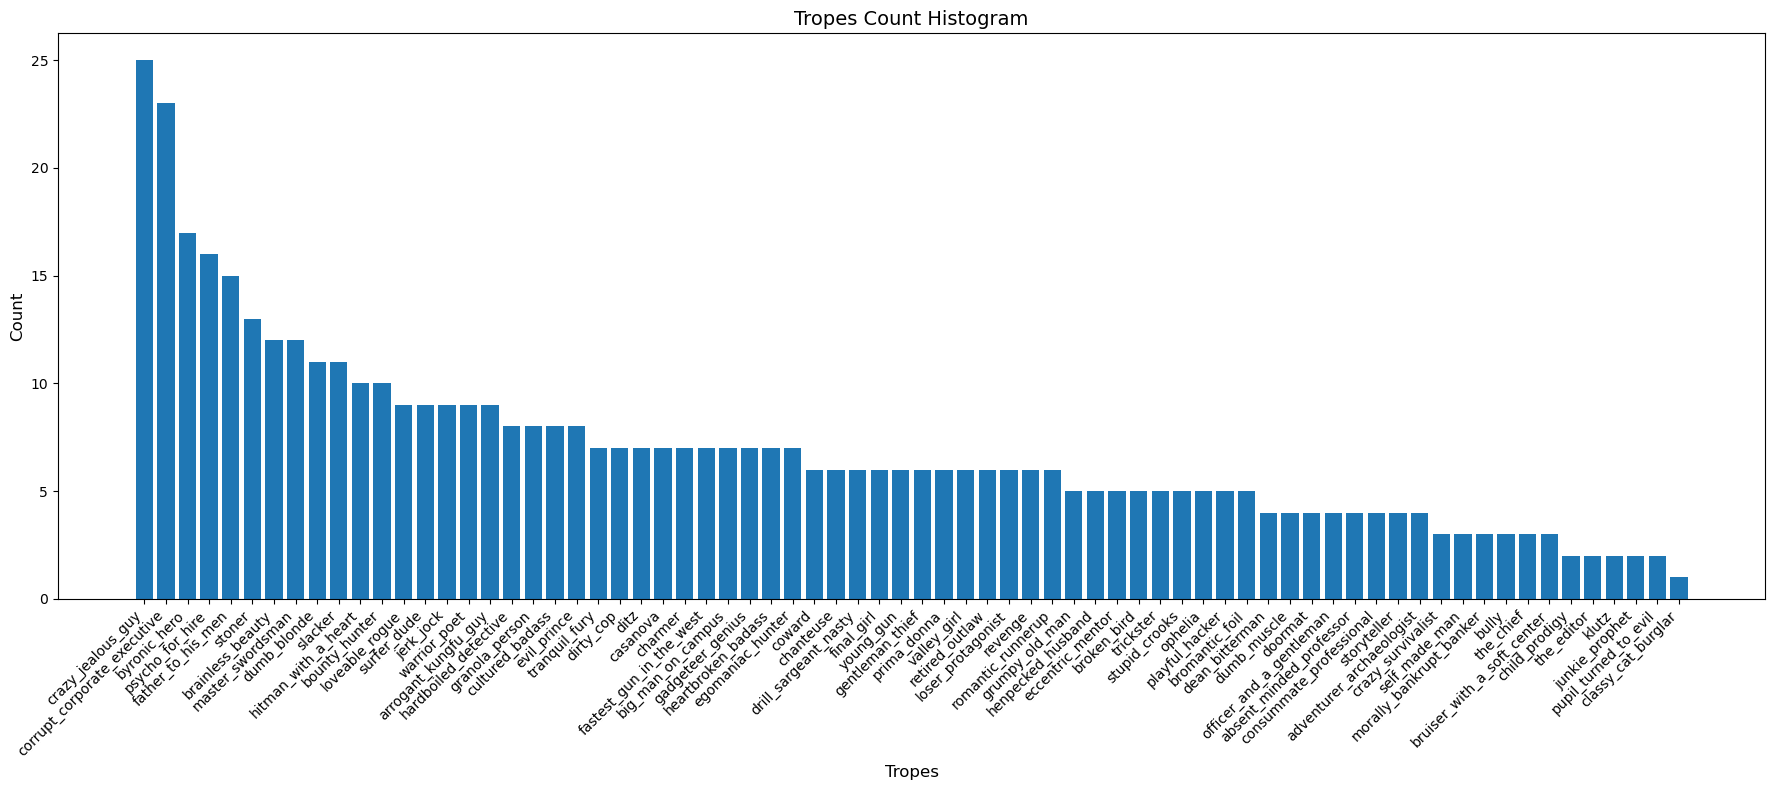

In [8]:
# Plot a histogram
plt.figure(figsize=(18, 8)) 

# Sort the data
tropes_count_sorted = tropes_count.sort_values(by='count', ascending=False)

plt.bar(tropes_count_sorted.index, tropes_count_sorted['count'])

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Tropes", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Tropes Count Histogram", fontsize=14)

plt.tight_layout()
plt.show()


## Tropes distribution by time period

In [9]:
# Get the movie year for each recorded character
tropes_by_year = pd.DataFrame(tv_tropes['Character trope'])
movie_dates = []
for movie_info in tv_tropes['Movie information']: # Get the movie release date for each character
    movie_info = ast.literal_eval(movie_info)
    character_id = movie_info['id']
    if character_metadata[character_metadata['Freebase character/actor map ID'] == character_id].empty:
        movie_date = None
    else:
        movie_date = character_metadata[character_metadata['Freebase character/actor map ID'] == character_id]['Release date'].values[0]
    movie_dates.append(movie_date)
tropes_by_year.insert(1, "Movie release year", movie_dates)
# Only keep the year
tropes_by_year['Movie release year'] = [int(str(date)[:4]) if date is not None else None for date in tropes_by_year['Movie release year']]
tropes_by_year = tropes_by_year[tropes_by_year['Movie release year'] >= 1960]
tropes_by_year.head()

,Character trope,Movie release year
0,absent_minded_professor,1994
1,absent_minded_professor,1994
3,absent_minded_professor,1994
4,adventurer_archaeologist,2008
5,adventurer_archaeologist,1981


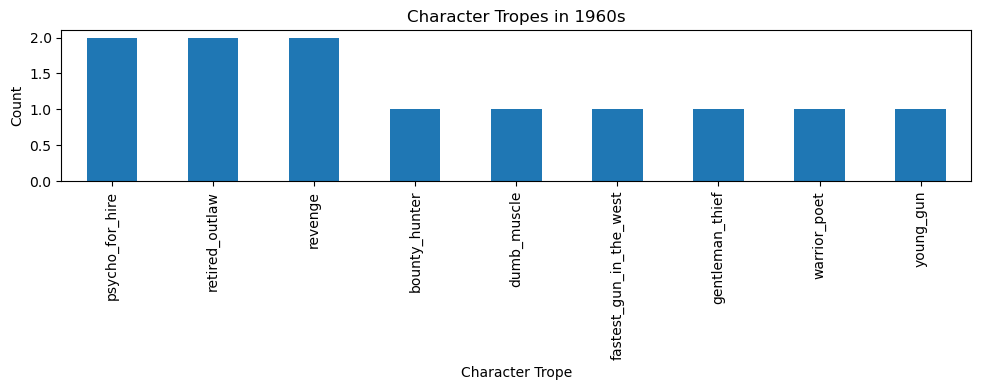

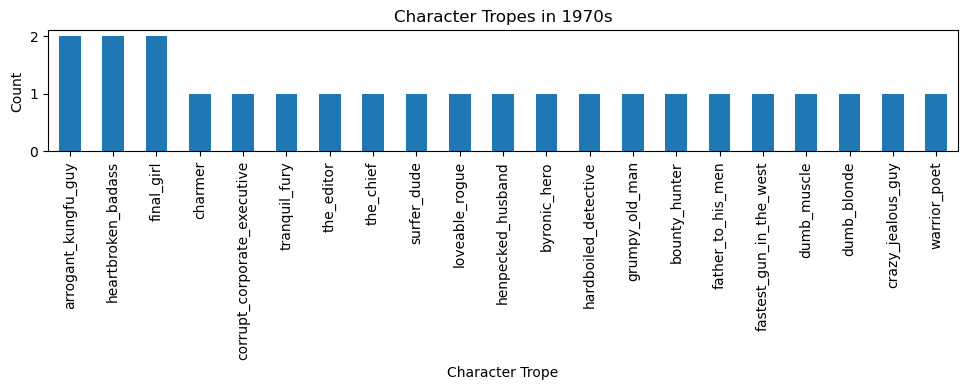

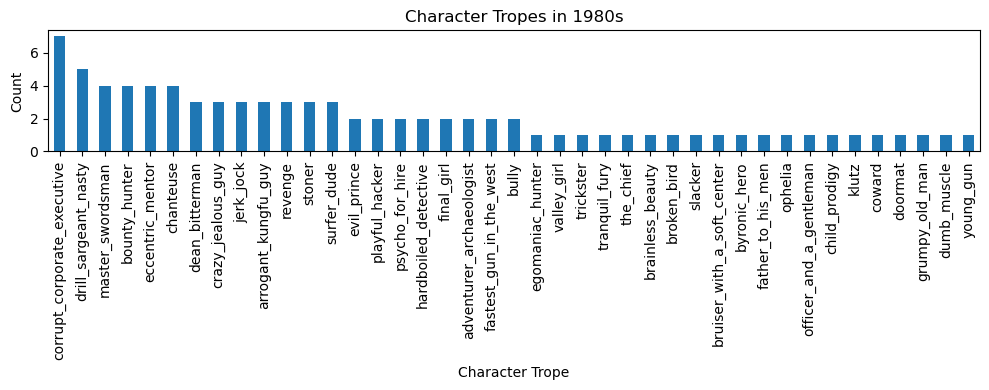

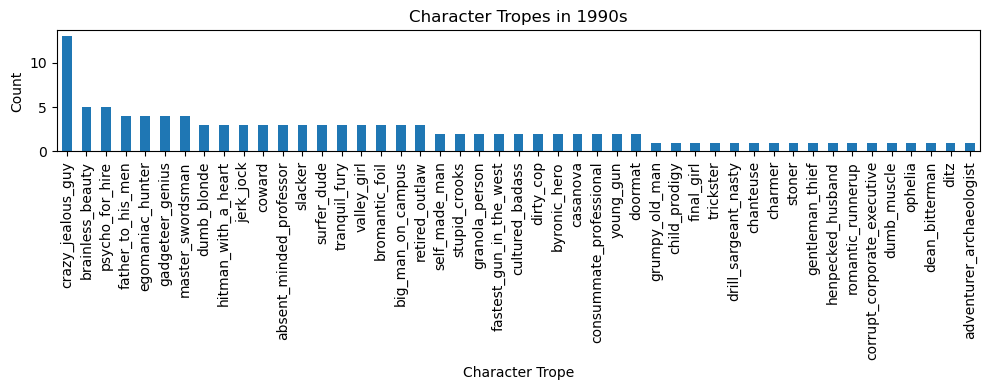

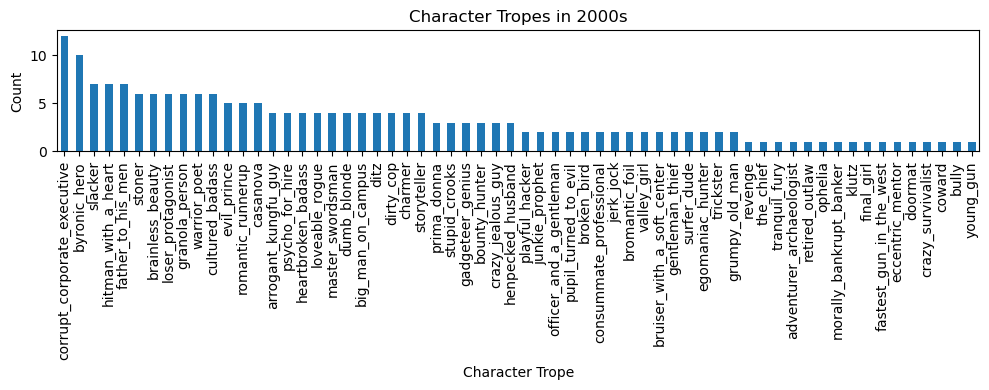

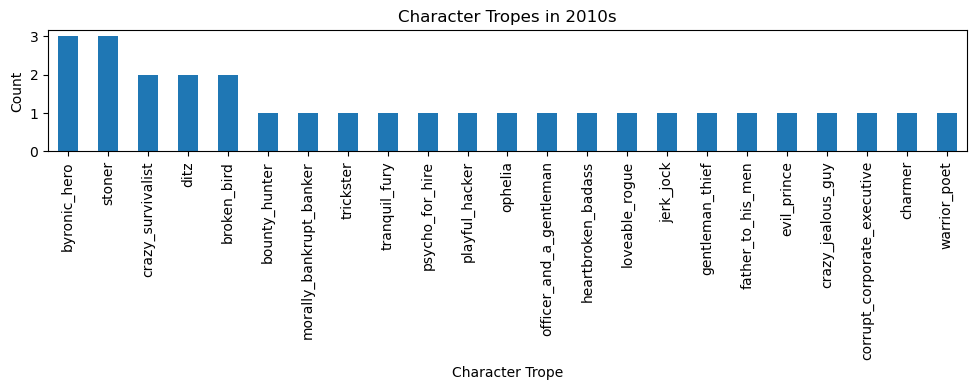

In [10]:
# Divide by decade
tropes_by_year['Decade'] = (tropes_by_year['Movie release year'] // 10) * 10

decade_trope_counts = tropes_by_year.groupby(['Decade', 'Character trope']).size().unstack(fill_value=0)

# Plot a histogram per decade
for decade in decade_trope_counts.index:
    trope_counts = decade_trope_counts.loc[decade][decade_trope_counts.loc[decade] > 0].sort_values(ascending=False) 
    
    plt.figure(figsize=(10, 4))
    trope_counts.plot(kind='bar')
    
    plt.title(f'Character Tropes in {decade}s')
    plt.xlabel('Character Trope')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()

## Tropes by gender

In [11]:
# Get the actor gender for each recorded character 
tropes_by_gender = pd.DataFrame(tv_tropes['Character trope'])
actors_gender = []
for movie_info in tv_tropes['Movie information']:
    movie_info = ast.literal_eval(movie_info)
    character_id = movie_info['id']
    if character_metadata[character_metadata['Freebase character/actor map ID'] == character_id].empty:
        gender = None
    else:
        gender = character_metadata[character_metadata['Freebase character/actor map ID'] == character_id]['Actor gender'].values[0]
    actors_gender.append(gender)
    
tropes_by_gender.insert(1, "Actor gender", actors_gender)

In [18]:
# Count the number of occurences for each gender
counts = tropes_by_gender['Actor gender'].value_counts()
counts.rename_axis('Gender').reset_index(name='Count')

,Gender,Count
0,M,430
1,F,69


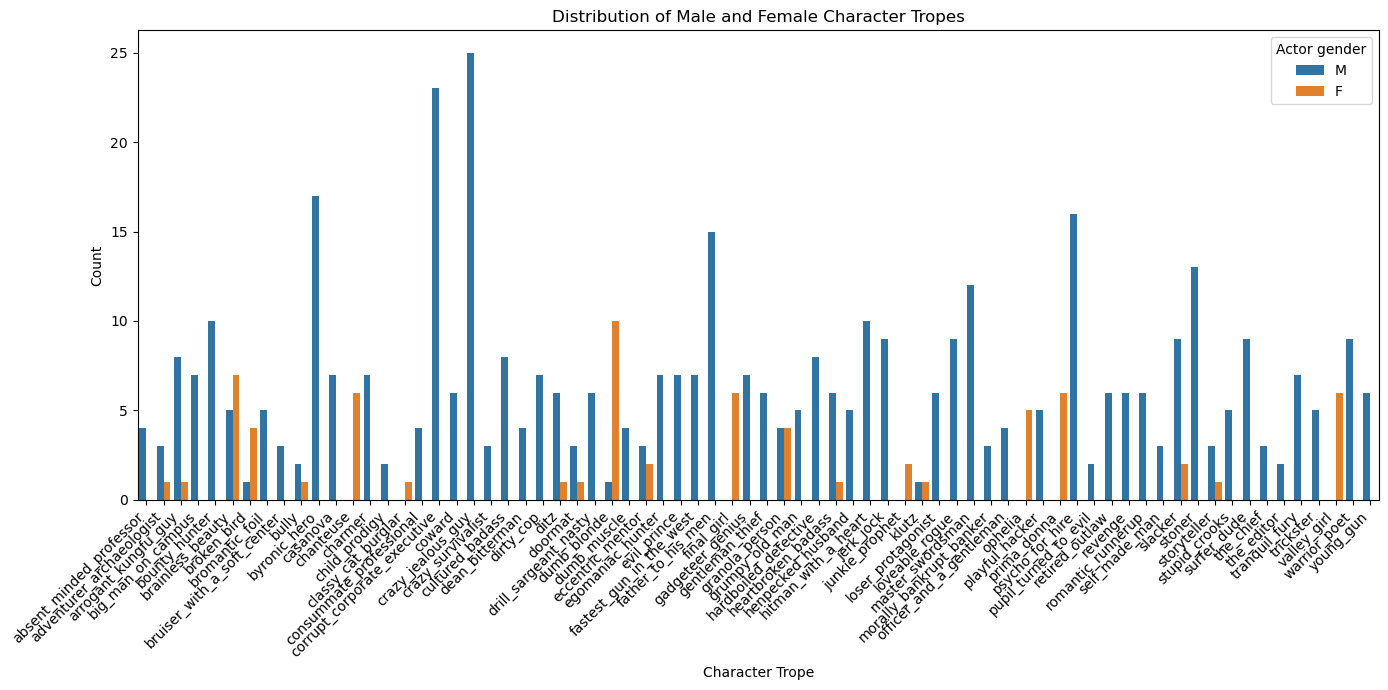

In [13]:
# Count the number of F and M for each trope
trope_counts = tropes_by_gender.groupby(['Character trope', 'Actor gender']).size().reset_index(name='Count')

# Plot a histogram comparing the two
plt.figure(figsize=(14, 7))
sns.barplot(x='Character trope', y='Count', hue='Actor gender', data=trope_counts)

plt.title('Distribution of Male and Female Character Tropes')
plt.xlabel('Character Trope')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

## Tropes by genre

In [14]:
# Get the movie genre for each recorded character 
tropes_by_genre = pd.DataFrame(tv_tropes['Character trope'])
movie_genre = []
for movie_info in tv_tropes['Movie information']:
    movie_info = ast.literal_eval(movie_info)
    movie_name = movie_info['movie']
    if movie_metadata[movie_metadata['Name'] == movie_name].empty:
        gender = None
    else:
        genre = movie_metadata[movie_metadata['Name'] == movie_name]['Genres'].values[0]
    movie_genre.append(genre)
    
tropes_by_genre.insert(1, "Movie genres", movie_genre)

In [15]:
tropes_by_genre.head()

,Character trope,Movie genres
0,absent_minded_professor,"['Family Film', 'Adventure Comedy', 'Comedy']"
1,absent_minded_professor,"['Adventure', 'Black-and-white']"
2,absent_minded_professor,"['Natural horror films', 'Science Fiction', 'H..."
3,absent_minded_professor,"['Thriller', 'Science Fiction', 'Action', 'Sci..."
4,adventurer_archaeologist,"['Thriller', 'Adventure', 'Costume Adventure',..."


/var/folders/13/nhns1byn0y74c0cfvxpvxz3m0000gn/T/ipykernel_69173/3044666182.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_tropes_per_genre = trope_genre_counts.groupby('Movie genres').apply(


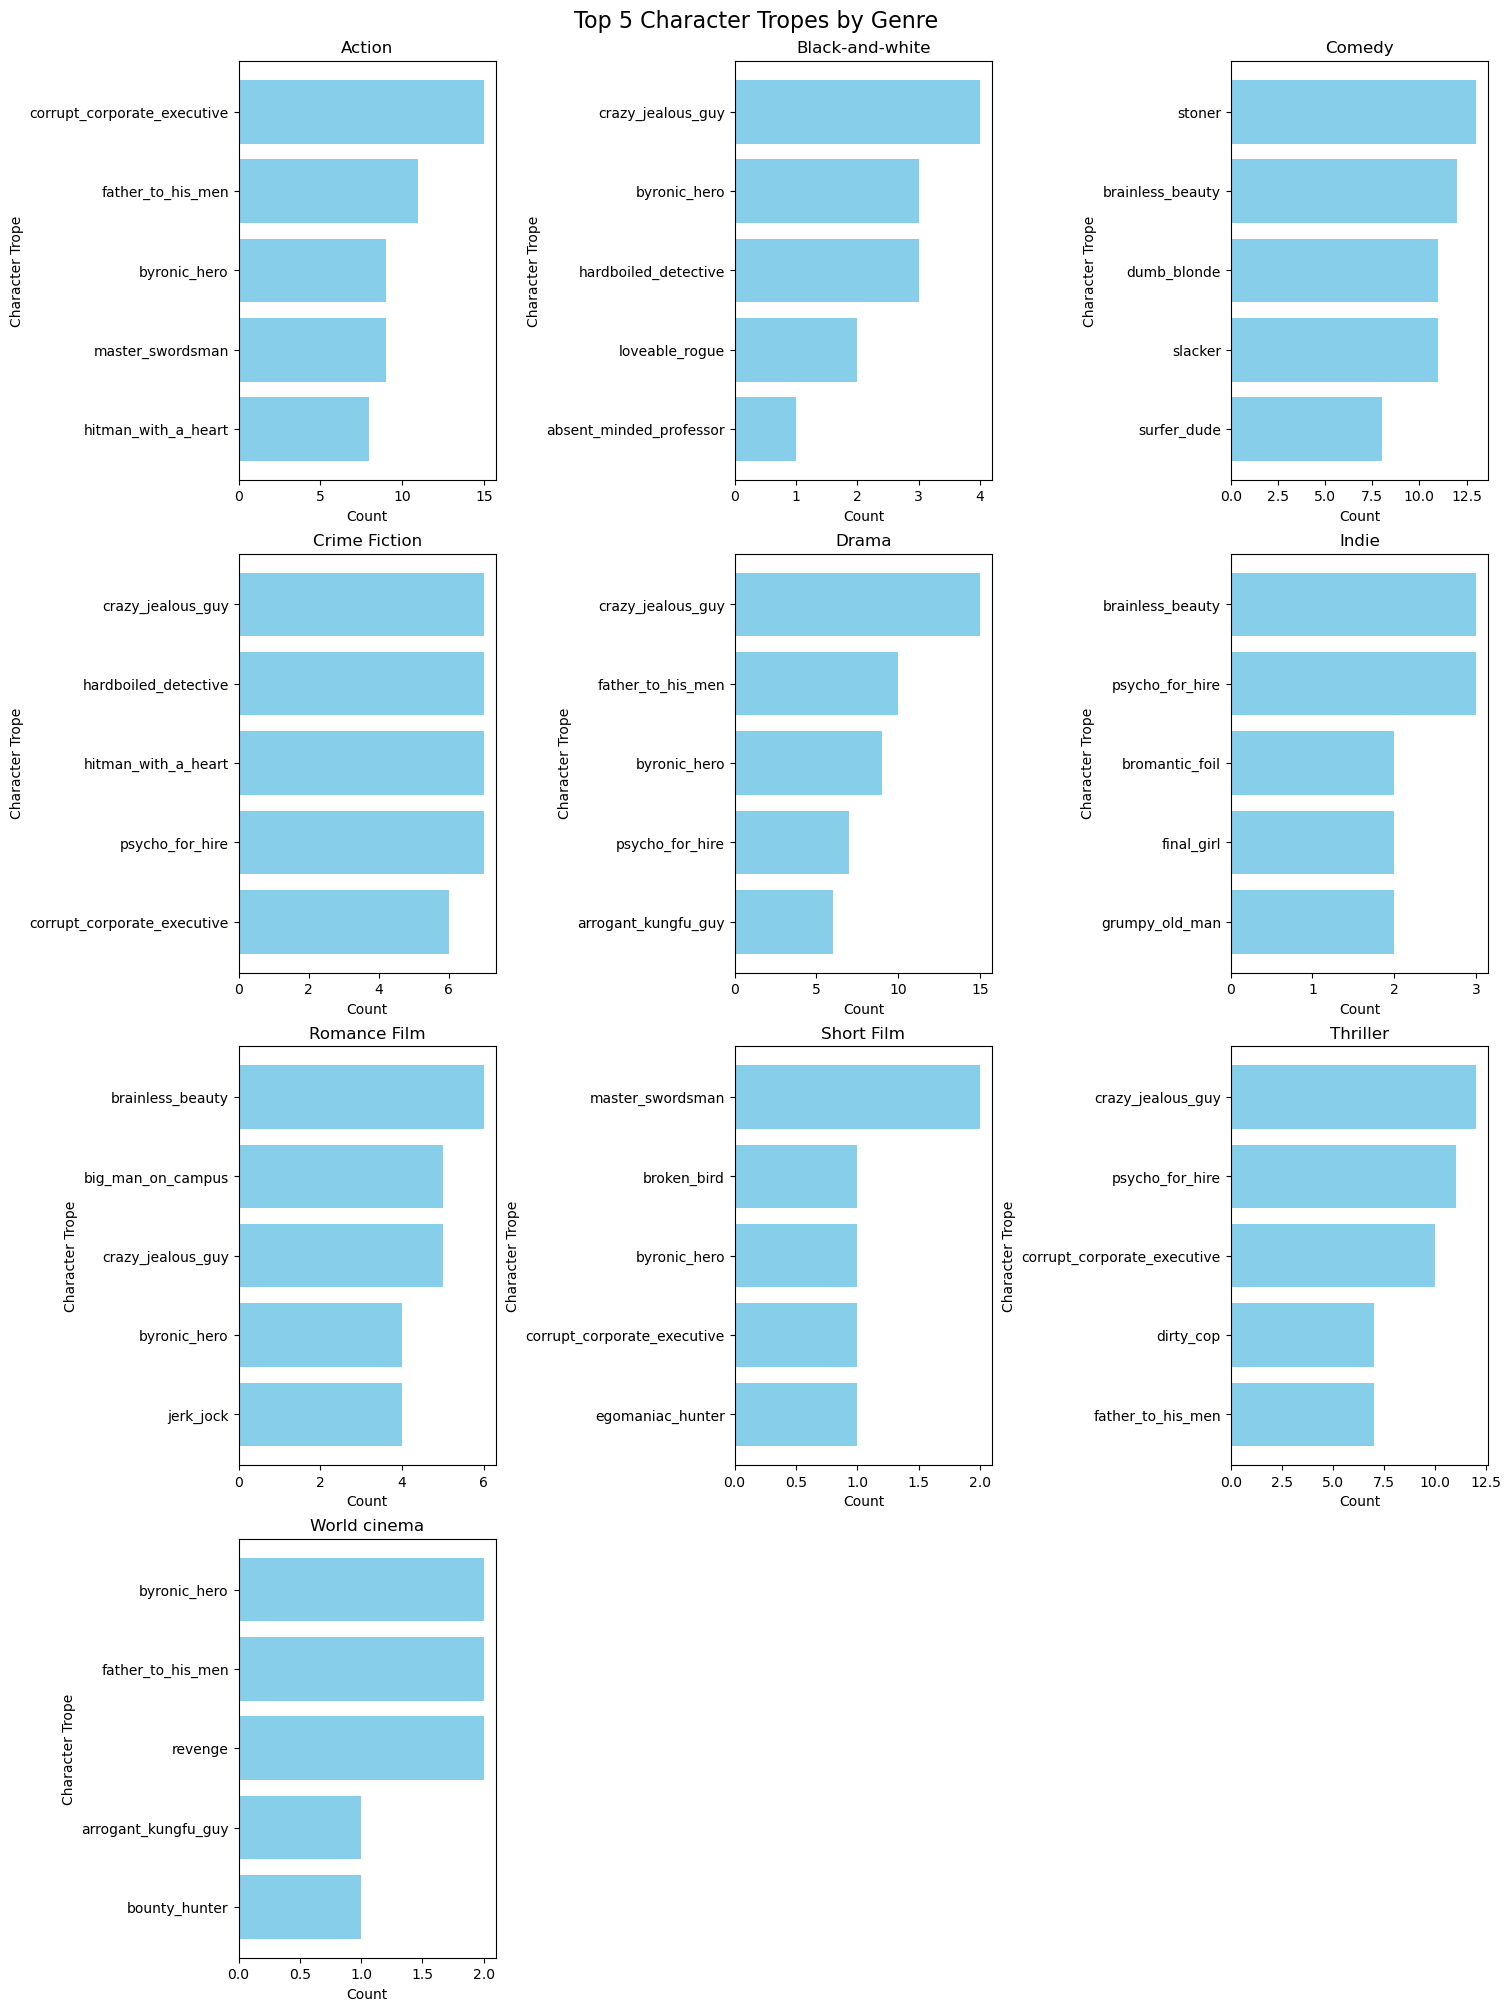

In [16]:
# Convert the 'Movie genres' column from strings to actual lists
tropes_by_genre['Movie genres'] = tropes_by_genre['Movie genres'].apply(ast.literal_eval)

# Exploding the genre list to have one genre per row
tropes_by_genre_exploded = tropes_by_genre.explode('Movie genres')

# Only keep the top 10 genres
genres_of_interest = ['Drama', 'Comedy', 'Romance Film', 'Black-and-white', 
                      'Action', 'Thriller', 'Short Film', 'World cinema', 
                      'Crime Fiction', 'Indie']

# Filter the DataFrame to include only the specified genres
filtered_tropes_by_genre = tropes_by_genre_exploded[tropes_by_genre_exploded['Movie genres'].isin(genres_of_interest)]

# Count the occurrences of each trope within each genre
trope_genre_counts = filtered_tropes_by_genre.groupby(['Movie genres', 'Character trope']).size().reset_index(name='count')

# Filter to get the top 5 tropes for each genre
top_10_tropes_per_genre = trope_genre_counts.groupby('Movie genres').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

# Plotting all genres in subplots
unique_genres = top_10_tropes_per_genre['Movie genres'].unique()
num_genres = len(unique_genres)
cols = 3  # Number of columns in the subplot grid
rows = (num_genres + cols - 1) // cols  # Calculate rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5), constrained_layout=True)

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each genre
for i, genre in enumerate(unique_genres):
    genre_data = top_10_tropes_per_genre[top_10_tropes_per_genre['Movie genres'] == genre]
    
    ax = axes[i]
    ax.barh(genre_data['Character trope'], genre_data['count'], color='skyblue')
    ax.set_title(f'{genre}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Character Trope')
    ax.invert_yaxis()  # Invert y-axis for better readability

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.suptitle('Top 5 Character Tropes by Genre', fontsize=16)
plt.show()